<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombre: Solis Procopio Uriel
#Simulación II
#AnyLogic

#Introducción
AnyLogic es una plataforma de simulación multi-método y multi-agente utilizada para modelar y simular sistemas complejos en una amplia gama de industrias. La metodología de programación en AnyLogic combina tres paradigmas principales: diagrama de bloques, programación orientada a objetos y programación basada en agentes.

#Instalación AnyLogic

Para la instalación basta con descargar el archivo necesario para algunos de los sistemas operativos desde el siguiente link: https://www.anylogic.com/downloads/

Seleccionamos el sistema operativo que estemos utilizando y descargamos el archivo posteirmente nos dirigimos al archivo descargado e instalamos como usualmente hacemos.

#Metodológia de programación

*Diagrama de bloques:* AnyLogic permite construir modelos utilizando diagramas de bloques. En este enfoque, puedes arrastrar y soltar componentes predefinidos, como objetos de simulación, eventos, fuentes de datos, etc., en un lienzo y conectarlos para formar el flujo lógico del modelo. Los bloques representan entidades del sistema y las conexiones representan el flujo de información o eventos entre ellos. Este enfoque visual facilita la construcción y comprensión del modelo.

*Programación orientada a objetos:* AnyLogic también permite utilizar programación orientada a objetos (POO) para personalizar y extender los modelos. Puedes definir tus propias clases, métodos y variables para crear componentes personalizados que se adapten a tus necesidades específicas. La POO en AnyLogic se basa en el lenguaje de programación Java, lo que significa que puedes utilizar todas las características y funcionalidades de Java en tus modelos.

*Programación basada en agentes:* AnyLogic es conocido por su enfoque en la programación basada en agentes (PBA), que se utiliza para modelar y simular sistemas en los que los agentes individuales tienen comportamientos autónomos. Los agentes son entidades individuales que pueden interactuar entre sí y con el entorno. Puedes definir agentes personalizados con características, comportamientos y reglas específicas. AnyLogic proporciona herramientas y bibliotecas para modelar sistemas basados en agentes de manera eficiente.

Además de estos paradigmas de programación, AnyLogic ofrece una amplia gama de bibliotecas y componentes predefinidos que facilitan la construcción de modelos en diferentes dominios, como logística, fabricación, atención médica, transporte, etc. También es posible utilizar datos reales y conectar el modelo con fuentes de datos externas para realizar análisis y validaciones precisas.

#Utilidad

Podemos expresarlas de la siguiente manera

*Modelado y simulación de sistemas complejos:* AnyLogic permite modelar y simular sistemas complejos en una amplia variedad de industrias y dominios. Puedes representar diferentes aspectos de un sistema, incluyendo el comportamiento de los objetos, la interacción entre agentes, el flujo de procesos, las restricciones de recursos y más. Esto te permite comprender mejor el sistema y evaluar diferentes escenarios y estrategias.

*Bibliotecas y componentes predefinidos:* AnyLogic proporciona una amplia gama de bibliotecas y componentes predefinidos que te permiten construir modelos de manera más rápida y sencilla. Estas bibliotecas incluyen objetos y funciones específicas para diferentes industrias y aplicaciones, como logística, transporte, fabricación, atención médica, minería, etc. También puedes crear tus propios componentes personalizados para adaptarse a tus necesidades específicas.

*Integración de datos y análisis avanzado:* AnyLogic te permite integrar datos reales en tus modelos de simulación, lo que te permite realizar análisis más precisos y validar tus resultados con datos históricos. Puedes importar datos desde diferentes fuentes, como hojas de cálculo, bases de datos y archivos de texto. Además, AnyLogic ofrece herramientas para realizar análisis avanzados, como optimización, análisis de sensibilidad y experimentos de Monte Carlo.

*Visualización y presentación de resultados:* AnyLogic proporciona herramientas de visualización avanzadas para representar gráficamente los resultados de tus simulaciones. Puedes crear gráficos interactivos, diagramas de flujo, animaciones y tablas para mostrar los resultados de manera clara y comprensible. Esto facilita la comunicación de tus hallazgos y conclusiones a colegas, clientes y partes interesadas.

*Análisis de escenarios y toma de decisiones:* Con AnyLogic, puedes ejecutar múltiples escenarios y comparar los resultados para evaluar diferentes estrategias y tomar decisiones informadas. Puedes ajustar parámetros, cambiar reglas y políticas, y observar cómo afectan al sistema en general. Esto te ayuda a comprender mejor las implicaciones de tus decisiones y optimizar el rendimiento del sistema.

#Ejemplo En Python

Instalamos Simpy agregando la siguiente linea de código antes de iniciar a programar

In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importa las bibliotecas necesarias, incluyendo SimPy para la simulación y matplotlib para la visualización de resultados.

In [2]:
import simpy
import random
import matplotlib.pyplot as plt

Define la clase SupermarketModel que representará el modelo de simulación del supermercado. Esta clase contendrá los eventos y procesos necesarios para simular la llegada y el servicio de los clientes.

In [3]:
class SupermarketModel:
    def __init__(self, env, arrival_rate, service_time):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_time = service_time
        self.customers = []
        self.waiting_times = []

    def customer_arrival(self):
        while True:
            yield self.env.timeout(random.expovariate(self.arrival_rate))
            customer = self.env.process(self.customer_service())
            self.customers.append(customer)

    def customer_service(self):
        arrival_time = self.env.now
        with self.cashier.request() as request:
            yield request
            yield self.env.timeout(random.expovariate(1 / self.service_time))
        departure_time = self.env.now
        waiting_time = departure_time - arrival_time
        self.waiting_times.append(waiting_time)

    def run_simulation(self, sim_time):
        self.env = simpy.Environment()
        self.cashier = simpy.Resource(self.env, capacity=1)
        self.env.process(self.customer_arrival())
        self.env.run(until=sim_time)


Configura los parámetros de la simulación, como la tasa de llegada de clientes y el tiempo de servicio promedio, y luego ejecuta la simulación durante un tiempo determinado.

In [4]:
    # Configuración de parámetros
    arrival_rate = 0.3  # Tasa de llegada de clientes (clientes por minuto)
    service_time = 2.0  # Tiempo de servicio promedio (minutos)
    simulation_time = 60  # Tiempo de simulación (minutos)

    # Crear y ejecutar el modelo de simulación
    model = SupermarketModel(simpy.Environment(), arrival_rate, service_time)
    model.run_simulation(simulation_time)

Visualiza los resultados de la simulación, como los tiempos de espera en la cola, utilizando un histograma.

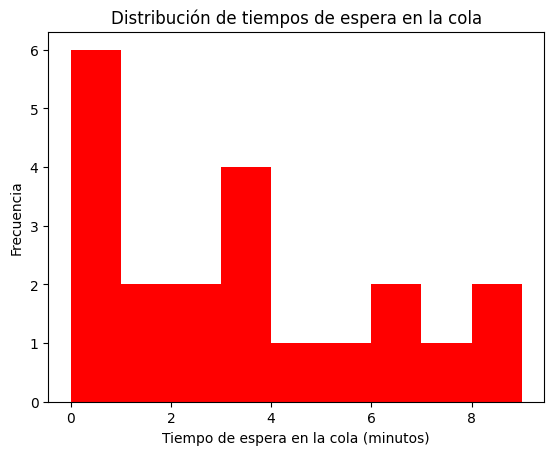

In [7]:
 # Visualizar los resultados
plt.hist(model.waiting_times, bins=range(10), color = 'red')
plt.xlabel('Tiempo de espera en la cola (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de tiempos de espera en la cola')
plt.show()

En este ejemplo, el modelo de simulación del supermercado utiliza la biblioteca SimPy para simular la llegada y el servicio de los clientes. Se genera una tasa de llegada de clientes aleatoria mediante una distribución exponencial, y se simula el tiempo de servicio utilizando una distribución exponencial inversa. Se registra el tiempo de espera de cada cliente en la cola y se visualiza la distribución de los tiempos de espera utilizando un histograma.

#Simulación AnyLogic

*Configuración del modelo*

1. Abrimos AnyLogic y crea un nuevo modelo de simulación.
2. Definimos los parámetros del modelo, como la tasa de llegada de clientes y el tiempo de servicio promedio.
3. Agregamos los elementos gráficos necesarios para representar el supermercado, como áreas de espera y cajas registradoras.

*Creación del agente "Cliente"*

1. Creamos un nuevo agente llamado "Cliente" que representará a cada cliente individual en el supermercado.
2. Definimos las características del agente "Cliente", como su tiempo de llegada, tiempo de servicio, tiempo de espera, etc.
3. Podemos utilizar variables en el agente para realizar un seguimiento de la información relevante de cada cliente.

*Generación de clientes*

1. Utilizamos elementos de generación de eventos en el modelo para simular la llegada de clientes al supermercado.
2. Configuramos el generador de eventos para generar clientes en intervalos de tiempo aleatorios o siguiendo una distribución específica.
3. Al generar un nuevo cliente, crea una instancia del agente "Cliente" y configura su tiempo de llegada al supermercado.

*Proceso de servicio*

1. Utilizamos elementos de procesamiento en el modelo para simular el servicio de los clientes en las cajas registradoras.
2. Configuramos el tiempo de servicio de cada cliente utilizando una distribución aleatoria o específica.
3. Utilizamos colas y recursos en el modelo para gestionar el flujo de clientes hacia las cajas registradoras.

*Recopilación de datos y análisis*

1. Utilizaos elementos de recopilación de datos en el modelo para capturar métricas relevantes, como el tiempo de espera de cada cliente en la cola.
2. Agregamos gráficos y estadísticas en tiempo real para visualizar y analizar los datos recopilados durante la simulación.
3. Experimentamos con diferentes configuraciones y parámetros para optimizar la eficiencia operativa del supermercado.